In [1]:
# Import libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
import regex as re
from nltk.corpus import stopwords
from sklearn.feature_extraction import text 

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

## Read in Data

In [2]:
# read in data
df = pd.read_csv('../data/who_tweets_clean.csv', )

In [43]:
# set column types
df['text'] = df['text'].astype(str)
df['date'] = pd.to_datetime(df['date'])

In [44]:
df.shape

(6191, 2)

## EDA

### Remove Stop Words

In [58]:
# from the eda, remove popular wards that are not that significant
common_words = ["cases", "transmission", "health", "care", "emergency", "people", "million", "billion", "amp", "low", "middle", "income",
               "country", "countries"]

# remove time stop words
time_words = ["time", "today", "tomorrow", "yesterday", 
             "morning", "afternoon", "night",
             "day", "week", "weekend", "month", "year",
              "days", "weeks", "weekends", "months", "years",
             "monday", "tuesday", "wednesday", "thursday", "friday", "satudray", "sunday",
             "mon", "tues", "wed", "thurs", "fri", "sat", "sun"
             "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december",
             "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"
            ]


# add the lists together
additional_stop_words = time_words + common_words

### Start with Common Words

In [59]:
# create a count vectorizer for singular words
cvec1 = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(additional_stop_words),  # add my custom stop words to default 'english'
                       min_df=5, 
                       ngram_range=(1,1),
                       max_df=1.0)

In [60]:
def top_words(vectorizer, tweets):
    df = pd.DataFrame(vectorizer.fit_transform(tweets).toarray(), columns=vectorizer.get_feature_names())
    
    # create dataframe with top words
    top_words = df.sum().T.sort_values(0, ascending=False).head(30)
    
    return top_words

In [61]:
top_words(cvec1, df[df['date'] > '2020-01-01']['text'])

new              328
world            318
response         315
global           260
support          251
outbreak         248
pandemic         229
risk             227
need             206
public           203
work             202
disease          195
solidarity       186
working          183
protect          182
children         178
international    177
measures         174
access           173
ensure           163
help             163
lives            162
prevent          161
like             157
reported         152
community        148
use              144
virus            143
including        137
information      133
dtype: int64

In [48]:
# fit and transform my data to count vectorizer
term_mat1 = cvec1.fit_transform(df['text'])

In [49]:
# create a dataframe of my terms
term_df1 = pd.DataFrame(term_mat1.toarray(), columns=cvec1.get_feature_names())

In [51]:
# create a dataframe of the top 30 words in each group
top_words = term_df1.mean().T.sort_values(0, ascending=False).head(30)

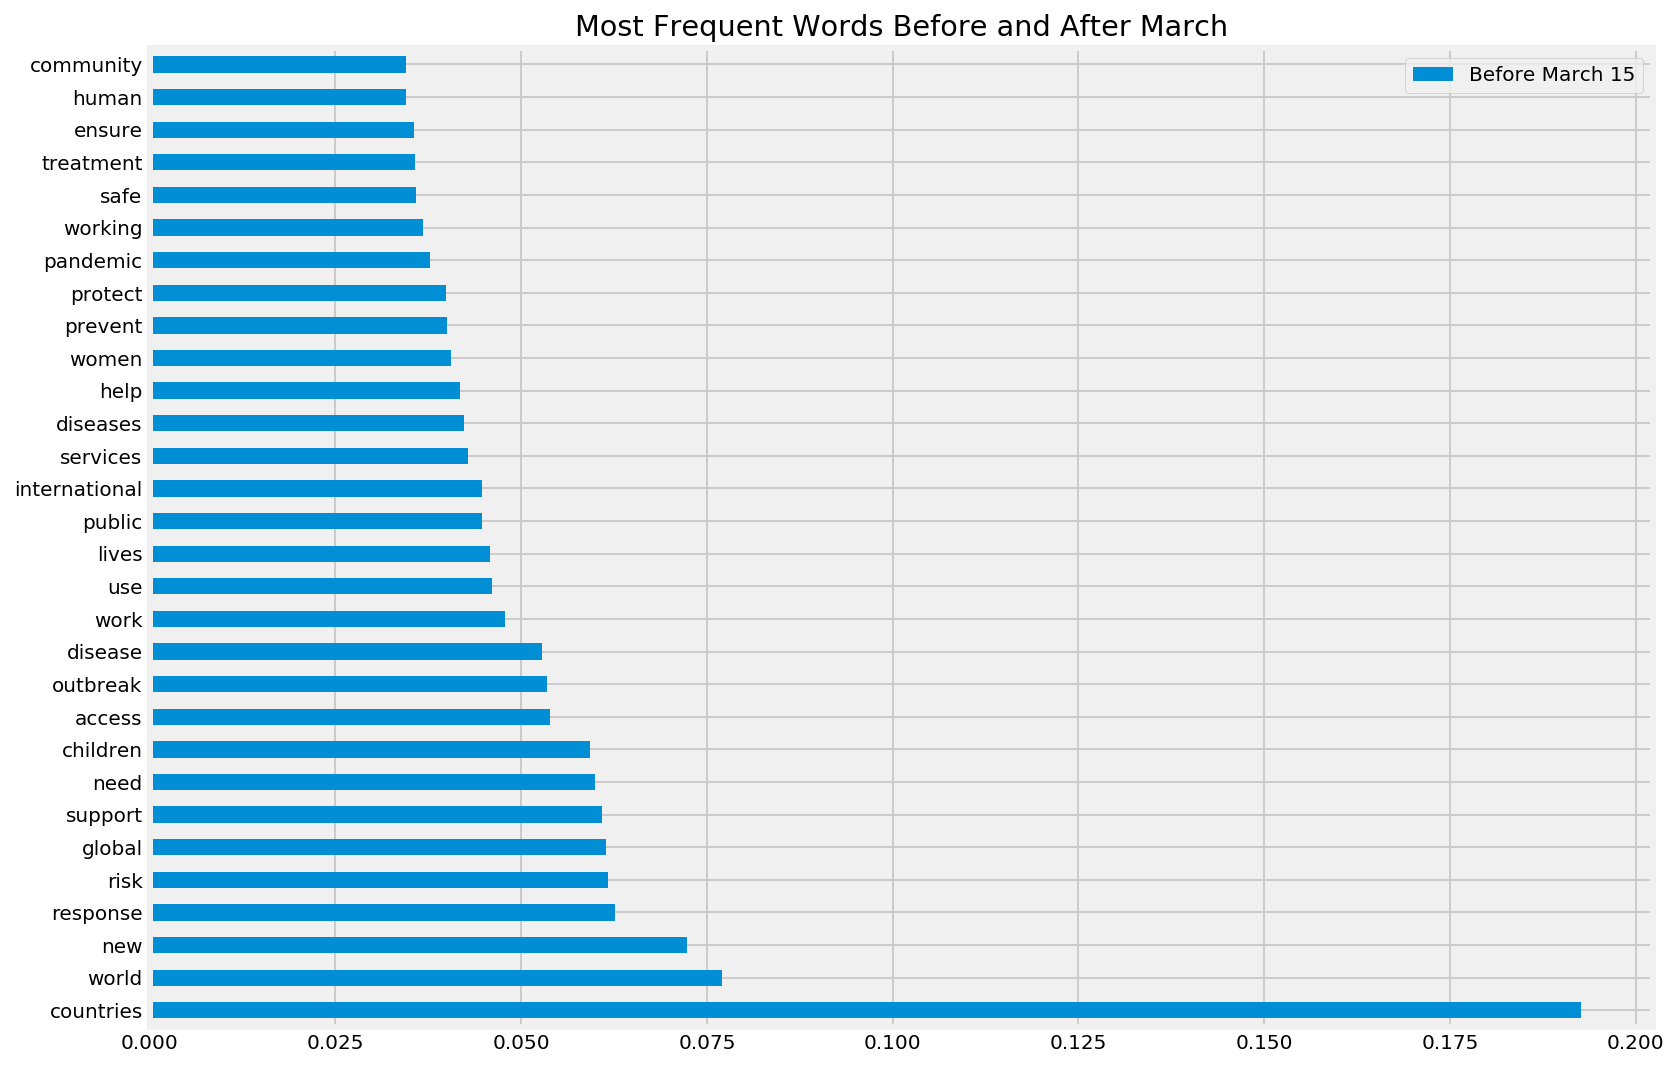

In [52]:
# Visualize the top words between each subreddit
top_words.plot(y=[0, 1], kind="barh", figsize= (12,9))
plt.title("Most Frequent Words Before and After March")
plt.legend(labels=["Before March 15", "After March 15"])
# plt.savefig("../plots/top_words.png");

### Visualize bigrams

In [28]:
# tokenize my words
cvec = CountVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(additional_stop_words), # adds my custom list of stop words to the default english one 
                       min_df=5, 
                       ngram_range=(2,3), # select for bigrams
                       max_df=1.0)

In [29]:
before_march_15 = df[df['date'] < '2020-03-15']

In [30]:
# fit and transform my data into the countvectorizer
term_mat = cvec.fit_transform(before_march_15['text'])

In [31]:
# create into dataframe
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

In [120]:
# insert my class column into my term dataframe
# term_df.insert(0, 'before_march_15', date)

In [32]:
# sort for the top 30 bigrams
top_bigrams = term_df.mean().T.sort_values(0, ascending=False).head(50)

In [24]:
df[df['text'].str.contains('collaboration')].sort_values('date', ascending = False)

ValueError: cannot index with vector containing NA / NaN values

In [33]:
top_bigrams

universal coverage                     0.018337
save lives                             0.015825
income countries                       0.014820
situation report                       0.014820
physical activity                      0.012308
international regulations              0.011806
new ncov                               0.011304
novel ncov                             0.009797
regulations committee                  0.009545
international regulations committee    0.009545
middle income                          0.009545
low middle                             0.009294
low middle income                      0.009294
human right                            0.009043
middle income countries                0.009043
nurses midwives                        0.008541
prevent spread                         0.007787
protective equipment                   0.007787
make sure                              0.007787
personal protective                    0.007285
noncommunicable diseases               0

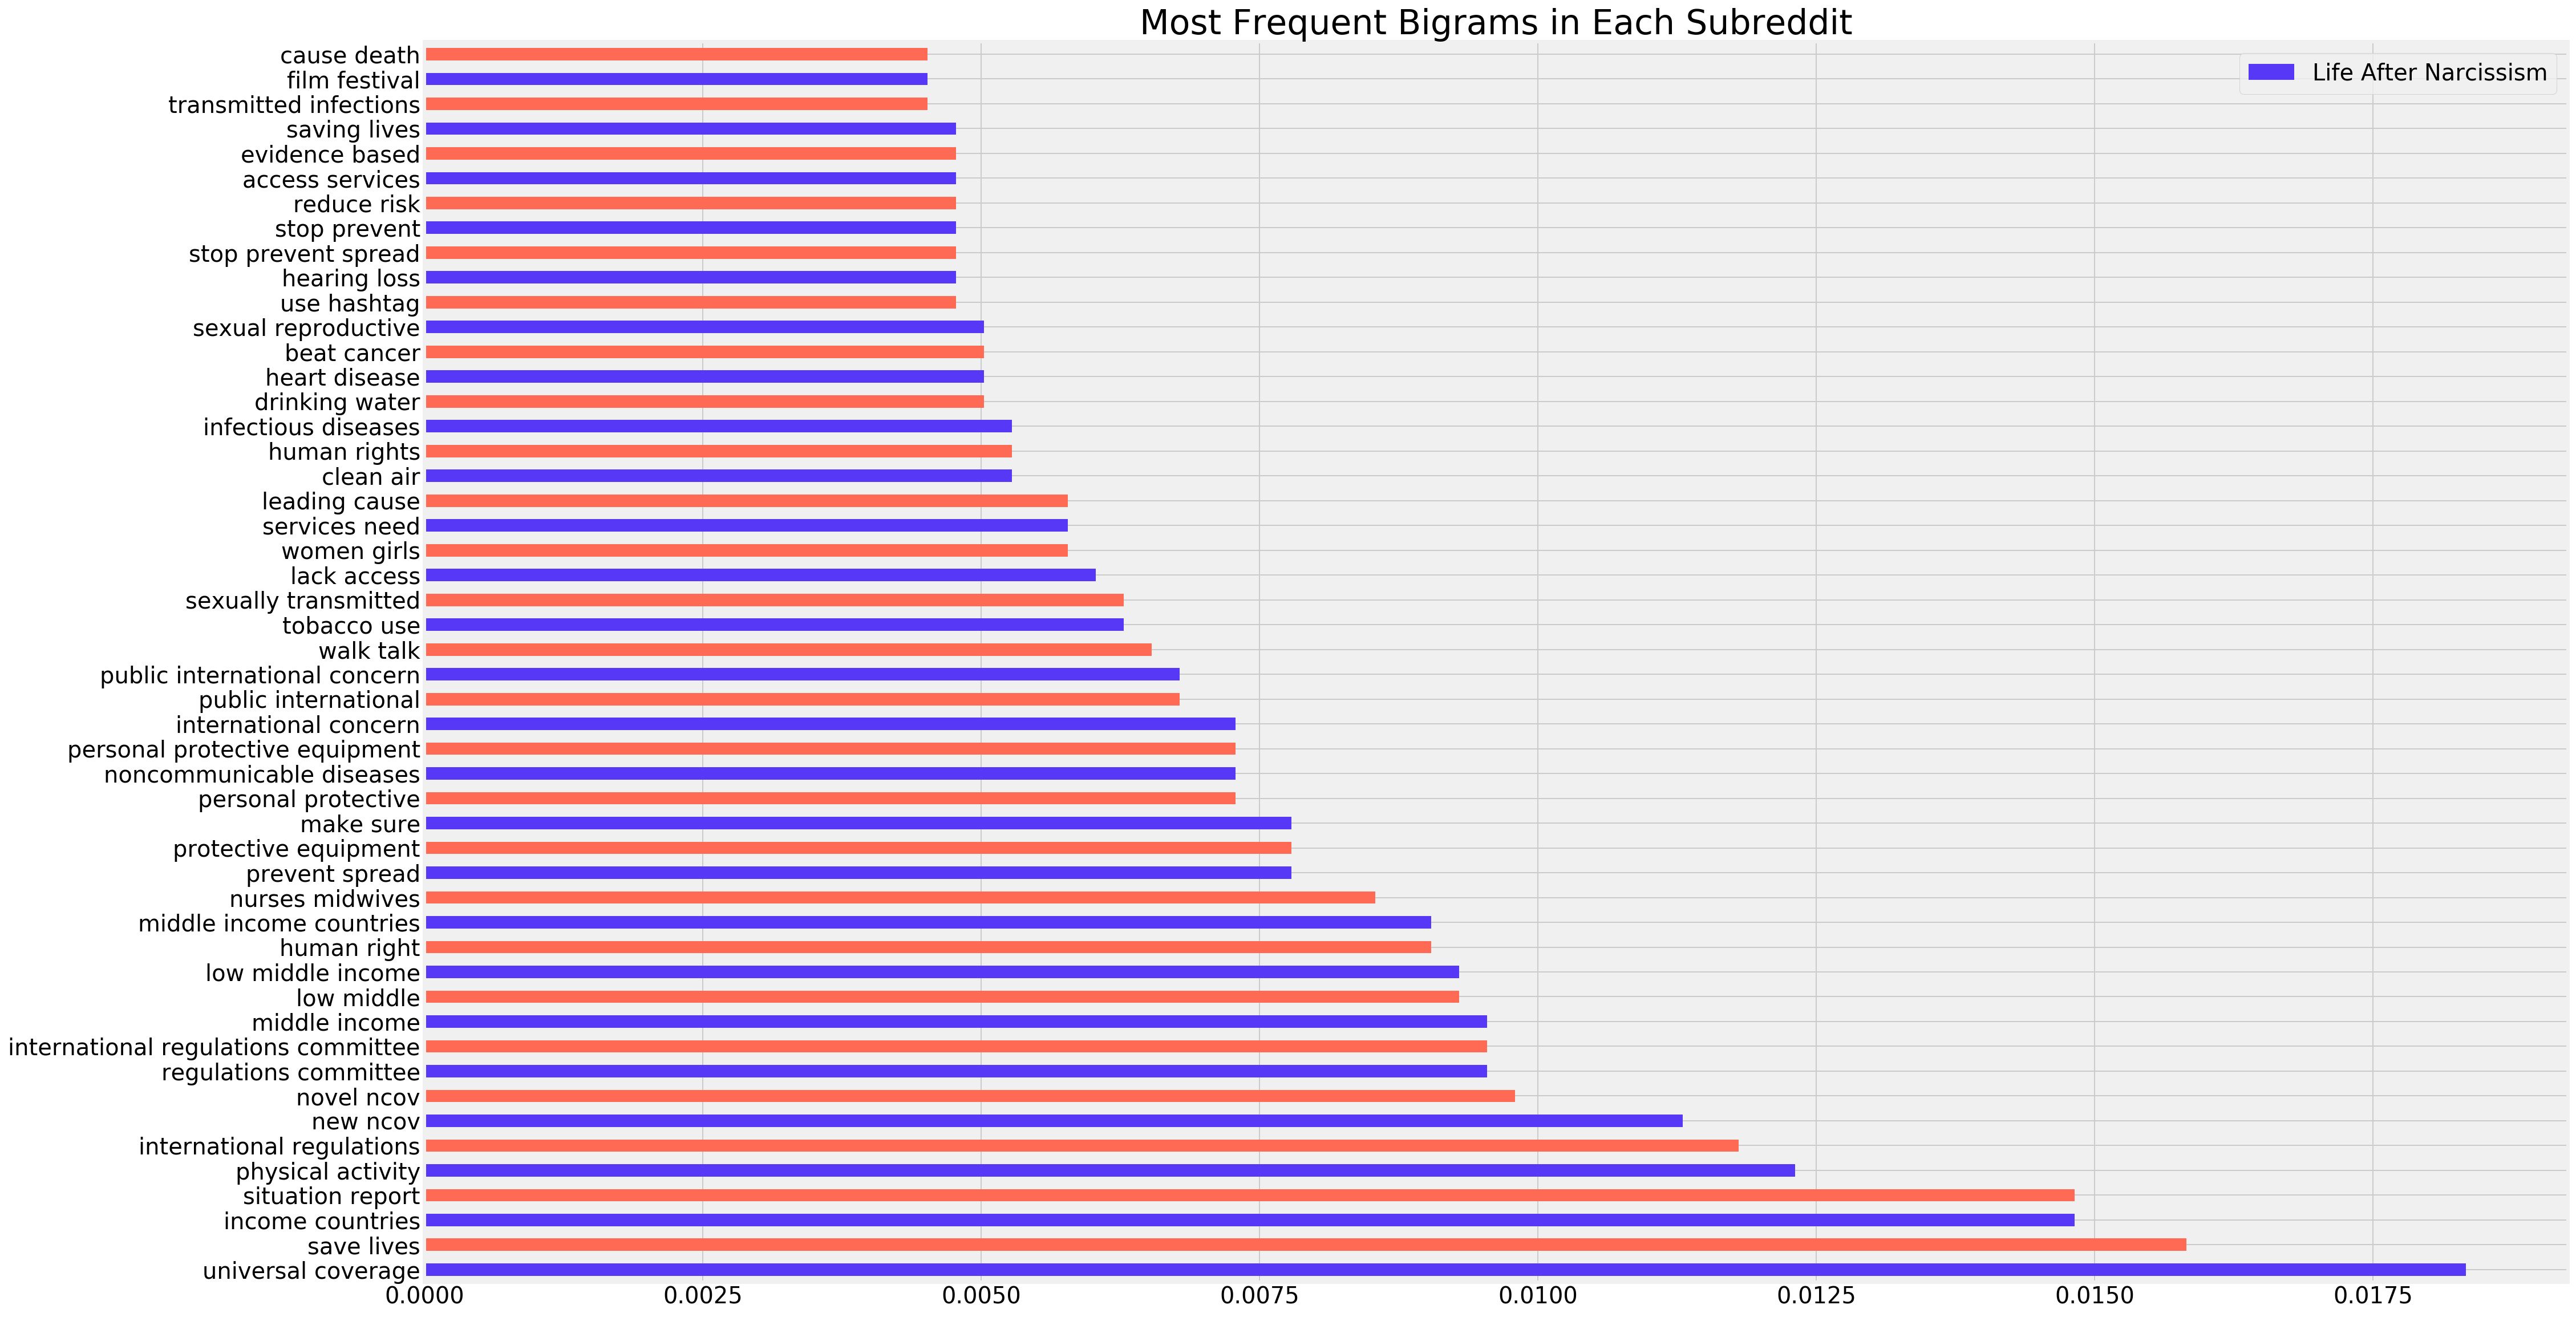

In [34]:
# Visualize the top words between each subreddit
top_bigrams.plot(y=[0, 1], kind="barh", color = ["#5738f6", "#ff6a54"], figsize= (30,20), fontsize=20)
plt.title("Most Frequent Bigrams in Each Subreddit", fontsize=30)
plt.legend(labels=["Life After Narcissism", "Raised By Narcissists"], fontsize =20)
# plt.savefig("../plots/top_bigrams.png");